In [1]:
import sys
#sys.path.append('/n/home06/jeast/integrated_methane_inversion/src/inversion_scripts/operators')
#sys.path.append('/n/home06/jeast/integrated_methane_inversion/src/inversion_scripts/')
sys.path.append('/n/home06/jeast/sat-operator')

In [2]:
import tropomi

In [3]:
import pandas as pd
import numpy as np
import xarray as xr

In [4]:
from glob import glob

In [5]:
import yaml

In [6]:
with open('config.yml', 'r') as file:
    cfg = yaml.safe_load(file)

In [7]:
np.ones((144,91,24,3),dtype=np.float64).nbytes

7547904

In [8]:
startdate = str(cfg['startdate'])
enddate = str(cfg['enddate'])
gc_cache = str(cfg['gc_cache'])
tropomidir = str(cfg['tropomidir'])
datadir = str(cfg['datadir'])

In [13]:
gc_startdate = pd.to_datetime(startdate, format='%Y%j')
gc_enddate = pd.to_datetime(enddate, format='%Y%j')
#gc_cache = '/n/holyscratch01/jacob_lab/jeast/gc-OH-runs/gc_2x25_merra2_CH4_v05OH-test/OutputDir/'

In [14]:
gc_startdate.strftime('%Y%m%dT%H%M%S')

'20190101T000000'

In [15]:
#tropomidir = '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/'

In [17]:
#tpath = f'{tropomidir}/S5P_RPRO_L2__CH4____20190101T183229_20190101T201359_06319_03_020400_20221118T035129.nc'
#tpath = f'{tropomidir}/{tropomipattern}'
tpath = f'{tropomidir}/*{gc_startdate.strftime("%Y%m%d")}*.nc'

In [18]:
sorted(glob(tpath))

['/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20181231T235559_20190101T013729_06308_03_020400_20221118T030539.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T013729_20190101T031859_06309_03_020400_20221118T031702.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T031859_20190101T050029_06310_03_020400_20221118T031704.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T050029_20190101T064159_06311_03_020400_20221118T031705.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T064159_20190101T082329_06312_03_020400_20221118T031707.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T082329_20190101T100459_06313_03_020400_20221118T031708.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T100459_20190101T114629_06314_03_020400_20221118T031710.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_

In [19]:
#tpaths = sorted(glob(
#    f'{tdir}/S5P_RPRO_L2__CH4____2019010[1234567]T??????_2019010[1234567]T??????_?????_03_020400_????????T??????.nc'
#))
tpaths = []
tidx = 0
for tdate in pd.date_range(gc_startdate,gc_enddate):
    for f in sorted(glob(tdate.strftime(tpath))):
        tpaths.append(f)
    #tpaths.append([f for f in sorted(glob(tdate.strftime(tpath)))])

In [21]:
tpath = f'{tropomidir}/*{gc_startdate.strftime("%Y%m%d")}*.nc'
tpaths = sorted(glob(tpath))
for f in tpaths:
    dstart = f.split('_')[-5]
    dend = f.split('_')[-6]
    datestr = gc_startdate.strftime('%Y%m%d')
    if ((datestr in dstart) | (datestr in dend )):
        continue
    else:
        tpaths.remove(f)

In [22]:
tpaths

['/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20181231T235559_20190101T013729_06308_03_020400_20221118T030539.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T013729_20190101T031859_06309_03_020400_20221118T031702.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T031859_20190101T050029_06310_03_020400_20221118T031704.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T050029_20190101T064159_06311_03_020400_20221118T031705.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T064159_20190101T082329_06312_03_020400_20221118T031707.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T082329_20190101T100459_06313_03_020400_20221118T031708.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T100459_20190101T114629_06314_03_020400_20221118T031710.nc',
 '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_

In [23]:
tfs1 = []
for f in tpaths:
    continue
    tf1 = tropomi.apply_average_tropomi_operator(
        filename = f,
        n_elements = None,
        gc_startdate = gc_startdate,
        gc_enddate = gc_enddate,
        xlim = np.array([-180,180]),
        ylim = np.array([-90,90]),
        gc_cache = gc_cache
    )
    tfs1.append(tf1)

In [135]:
# save daily file
for tdate in pd.date_range(gc_startdate,gc_enddate)[:-1]:
    print(f'\n\n----> Processing {tdate.strftime("%Y-%m-%d")} <----')
    
    # get the lat/lons of gc gridcells
    gc_lat_lon = tropomi.get_gc_lat_lon(gc_cache, tdate)
    
    # all swaths for today
    tpat = f'{tropomidir}/*{gc_startdate.strftime("%Y%m%d")}*.nc'
    tpaths = sorted(glob(tpat))
    # remove if not day of interest 
    for f in tpaths:
        dstart = f.split('_')[-5]
        dend = f.split('_')[-6]
        datestr = gc_startdate.strftime('%Y%m%d')
        if ((datestr in dstart) | (datestr in dend )):
            continue
        else:
            tpaths.remove(f)

    # grid each swath
    tfs = []
    for f in tpaths:
        print(f)
        tf = tropomi.apply_average_tropomi_operator(
            filename = f,
            n_elements = None,
            gc_startdate = tdate,
            gc_enddate = tdate + pd.Timedelta('1D'),
            xlim = np.array([-180,180]),
            ylim = np.array([-90,90]),
            gc_cache = gc_cache
        )
        tfs.append(tf)
        print()
        
    # convert to xarray dataset
    dslist = [tropomi.accumulate_to_dataset(obs['obs_GC'],gc_lat_lon) for obs in tfs]
    # strip Nones
    dslist = [ds for ds in dstmp if ds is not None]
    
    # merge
    dsout = xr.merge(dslist,compat='no_conflicts')
    
    # save
    ds.to_netcdf(
        tdate.strftime(f'{datadir}/TROPOMI_GC_XCH4_L3_%Y%m%d.nc'),
        encoding = {v:{'zlib':True,'complevel':1} for v in ds.data_vars}
    )



----> Processing 2019-01-01 <----
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20181231T235559_20190101T013729_06308_03_020400_20221118T030539.nc
Found 0 TROPOMI observations.
0

/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T013729_20190101T031859_06309_03_020400_20221118T031702.nc
Found 26 TROPOMI observations.
2

/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T031859_20190101T050029_06310_03_020400_20221118T031704.nc
Found 29202 TROPOMI observations.
84

/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T050029_20190101T064159_06311_03_020400_20221118T031705.nc
Found 17309 TROPOMI observations.
58

/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T064159_20190101T082329_06312_03_020400_20221118T031707.nc
Found 25716 TROPOMI observations.
67

/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T082329_20190101T100459_06313_03_020400_20221118T031708.

In [118]:
filename = '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T233659_20190102T011828_06322_03_020400_20221118T040312.nc'

In [127]:
gc_startdate.strftime('%Y%m%d') in filename.split('_')[-5]

False

In [150]:
filename.split('_')[-13]

'RPRO'

In [160]:
tpat = f'{tropomidir}/*{gc_startdate.strftime("%Y%m%d")}*.nc'
tpaths = sorted(glob(tpat))
# remove if not day of interest 
#[print(f) for f in tpaths]
for f in tpaths:
    print(f)
    datestr = gc_startdate.strftime('%Y%m%d')
    dstart = f.split('_')[-5]
    dend = f.split('_')[-6]
    myversion = f.split('_')[-2]
    mykind = f.split('_')[-13]
    print(dstart, dend, myversion, mykind)
    if (
        ((datestr in dstart) | (datestr in dend )) &
        (mykind in ['RPRO']) &
        (myversion in ['020400'])
    ):
        continue
    else:
        print(f'skipping {f}')
        tpaths = [myf for myf in tpaths if myf != f]
    print()
#print(tpaths)

/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20181231T235559_20190101T013729_06308_03_020400_20221118T030539.nc
20190101T013729 20181231T235559 020400 RPRO
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T013729_20190101T031859_06309_03_020400_20221118T031702.nc
20190101T031859 20190101T013729 020400 RPRO
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T031859_20190101T050029_06310_03_020400_20221118T031704.nc
20190101T050029 20190101T031859 020400 RPRO
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T050029_20190101T064159_06311_03_020400_20221118T031705.nc
20190101T064159 20190101T050029 020400 RPRO
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T064159_20190101T082329_06312_03_020400_20221118T031707.nc
20190101T082329 20190101T064159 020400 RPRO
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T082329_20190101T100459_06313_03_020400_20221118T0317

In [106]:
TROPOMI = tropomi.read_tropomi('/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T233659_20190102T011828_06322_03_020400_20221118T040312.nc')

In [107]:
xlim = np.array([-180,180])
ylim = np.array([-90,90])

In [113]:
def filter_tropomi(tropomi_data, xlim, ylim, startdate, enddate):
    """
    Description:
        Filter out any data that does not meet the following
        criteria: We only consider data within lat/lon/time bounds,
        with QA > 0.5, and with safe surface albedo values
    Returns:
        numpy array with satellite indices for filtered tropomi data.
    """
    return np.where(
        #(tropomi_data["longitude"] > xlim[0]) &
        #(tropomi_data["longitude"] < xlim[1]) &
        #(tropomi_data["latitude"] > ylim[0]) &
        #(tropomi_data["latitude"] < ylim[1]) #&
        (tropomi_data["time"] >= startdate) &
        (tropomi_data["time"] <= enddate) #&
        #(tropomi_data["qa_value"] >= 0.5) &
        #(tropomi_data["swir_albedo"] > 0.05) &
        #(tropomi_data["blended_albedo"] < 0.85)
    )

In [114]:
sat_ind = filter_tropomi(TROPOMI, xlim, ylim, gc_startdate, gc_enddate)

In [115]:
TROPOMI['methane'].size

697890

In [116]:
sat_ind[0].size

17415

In [117]:
(TROPOMI['methane'].size - sat_ind[0].size)/TROPOMI['methane'].size

0.9750462107208873

In [64]:
dstmp = [tropomi.accumulate_to_dataset(obs['obs_GC'],gc_cache) for obs in tfs1]
dstmp = [ds for ds in dstmp if ds is not None]

In [65]:
ds = xr.merge(dstmp,compat='no_conflicts')

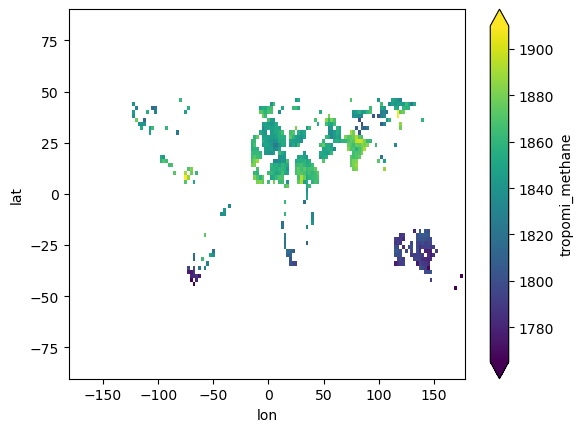

In [66]:
ds['tropomi_methane'].mean('time').plot(vmin=1765,vmax=1910)

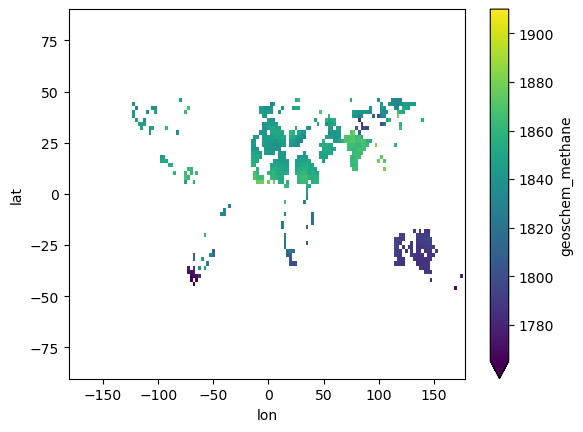

In [67]:
ds['geoschem_methane'].mean('time').plot(vmin=1765,vmax=1910)

In [14]:
ds['geoschem_methane'].mean()

<xarray.DataArray 'geoschem_methane' ()>
array(1842.71909149)

In [15]:
ds['tropomi_methane'].mean()

<xarray.DataArray 'tropomi_methane' ()>
array(1837.58707987)

In [12]:
ll = tropomi.get_gc_lat_lon(gc_cache,pd.to_datetime('20190101'))

In [14]:
len(tfs1)

4

In [23]:
import cftime

In [35]:
hours2 = tfs1[0]['obs_GC'][:,7]

In [36]:
(hours2 - hours2.min()).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [20]:
tcoords

DatetimeIndex(['2019-01-02 17:00:00', '2019-01-02 18:00:00'], dtype='datetime64[ns]', freq=None)

In [15]:
cfdates_all = np.unique(tfs1[0]['obs_GC'][:,7])

array([41., 42.], dtype=float32)

In [ ]:
dr = pd.date_range(gc_startdate,gc_enddate,freq='H')

In [ ]:
int(np.where(dr == pd.to_datetime('20190101_04',format='%Y%m%d_%H'))[0])

In [ ]:
import cftime

In [77]:
cftime.date2num(gc_enddate,'hours since 2019-01-01')

48

In [89]:
cftime.num2date(25,'hours since 2019-01-01').strftime('%Y%m%d_%H:%M:%S')

'20190102_01:00:00'

In [93]:
np.unique(tfs1[16]['obs_GC'][:,7]).astype(int)

array([5, 6])

In [122]:
hours = np.unique(tfs1[16]['obs_GC'][:,7])
cfdates = cftime.num2date(hours,'hours since 2019-01-01')
xr_tidx = xr.cftime_range(cfdates[0],cfdates[-1],freq='H').to_datetimeindex()

In [141]:
hours2 = tfs1[16]['obs_GC'][:,7]
cfdates2 = cftime.num2date(hours2,'hours since 2019-01-01')

In [144]:
xr.CFTimeIndex(cfdates2).to_datetimeindex()

DatetimeIndex(['2019-01-01 06:00:00', '2019-01-01 06:00:00',
               '2019-01-01 06:00:00', '2019-01-01 06:00:00',
               '2019-01-01 06:00:00', '2019-01-01 06:00:00',
               '2019-01-01 06:00:00', '2019-01-01 06:00:00',
               '2019-01-01 06:00:00', '2019-01-01 06:00:00',
               ...
               '2019-01-01 06:00:00', '2019-01-01 06:00:00',
               '2019-01-01 06:00:00', '2019-01-01 05:00:00',
               '2019-01-01 05:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 05:00:00',
               '2019-01-01 05:00:00', '2019-01-01 05:00:00'],
              dtype='datetime64[ns]', length=102, freq=None)

In [127]:
tmp = xr.Dataset(coords = {
    'time':xr_tidx
})

In [129]:
tmp

<xarray.Dataset>
Dimensions:  (time: 2)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T05:00:00 2019-01-01T06:00:00
Data variables:
    *empty*

In [132]:
tmp.loc[{'time':cfdates2[0].to_datetimeindex()}]

AttributeError: 'cftime._cftime.DatetimeGregorian' object has no attribute 'to_datetimeindex'

In [32]:
ds = xr.merge(dstmp,compat='no_conflicts')

MergeError: conflicting values for variable 'tropomi_methane' on objects to be combined. You can skip this check by specifying compat='override'.

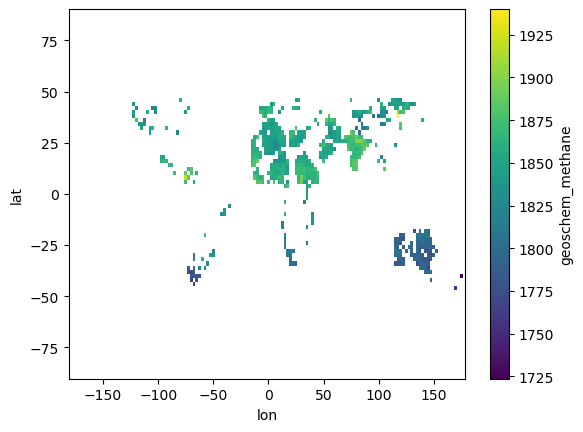

In [22]:
ds['geoschem_methane'].mean('time').plot()

In [12]:
allobs1 = np.vstack([tdict['obs_GC'] for tdict in tfs1])
#allobs2 = np.vstack([tdict['obs_GC'] for tdict in tfs2])

In [13]:
np.nanmean(allobs1,0)

/tmp/ipykernel_222623/2315123347.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(allobs1,0)


array([nan, nan, nan, nan, nan, nan], dtype=float32)

In [17]:
tpaths[1]

'/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T031859_20190101T050029_06310_03_020400_20221118T031704.nc'

In [35]:
TROPOMI = tropomi.read_tropomi(tpaths[1])

In [36]:
np.isnan(tf['methane']).all()

False

In [41]:
xlim = [-180,180]
ylim = [-90,90]
gc_startdate = pd.to_datetime('2019-01-01')
gc_enddate = pd.to_datetime('2019-01-02')
gc_cache = '/n/holyscratch01/jacob_lab/jeast/gc-OH-runs/gc_2x25_merra2_CH4_v05OH-test/OutputDir/'

In [42]:
sat_ind = tropomi.filter_tropomi(TROPOMI, xlim, ylim, gc_startdate, gc_enddate)

In [43]:
gc_lat_lon = tropomi.get_gc_lat_lon(gc_cache, gc_startdate)

In [45]:
obs_mapped_to_gc = tropomi.average_tropomi_observations(TROPOMI, gc_lat_lon, sat_ind)

Found 29202 TROPOMI observations.


In [56]:
n_gridcells = len(obs_mapped_to_gc)

# create list to store the dates/hour of each gridcell
all_strdate = [gridcell["time"] for gridcell in obs_mapped_to_gc]
all_strdate = list(set(all_strdate))

In [59]:
# Read GEOS_Chem data for the dates of interest
all_date_gc = tropomi.read_all_geoschem(all_strdate, gc_cache)

In [117]:
# Initialize array with n_gridcells rows and 6 columns. Columns are TROPOMI CH4, GEOSChem CH4, longitude, latitude, observation counts
obs_GC = np.zeros([n_gridcells, 9], dtype=np.float32)
obs_GC.fill(np.nan)

In [118]:
# For each gridcell dict with tropomi obs:
for i, gridcell_dict in enumerate(obs_mapped_to_gc):
    
    #if i>0:
    #    break

    # Get GEOS-Chem data for the date of the observation:
    p_sat = gridcell_dict["p_sat"]
    dry_air_subcolumns = gridcell_dict["dry_air_subcolumns"]  # mol m-2
    apriori = gridcell_dict["apriori"]  # mol m-2
    avkern = gridcell_dict["avkern"]
    strdate = gridcell_dict["time"]
    GEOSCHEM = all_date_gc[strdate]

    # Get GEOS-Chem pressure edges for the cell
    p_gc = GEOSCHEM["PEDGE"][gridcell_dict["iGC"], gridcell_dict["jGC"], :]
    # Get GEOS-Chem methane for the cell
    gc_CH4 = GEOSCHEM["CH4"][gridcell_dict["iGC"], gridcell_dict["jGC"], :]
    # Get merged GEOS-Chem/TROPOMI pressure grid for the cell
    merged = tropomi.merge_pressure_grids(p_sat, p_gc)
    # Remap GEOS-Chem methane to TROPOMI pressure levels
    sat_CH4 = tropomi.remap(
        gc_CH4,
        merged["data_type"],
        merged["p_merge"],
        merged["edge_index"],
        merged["first_gc_edge"],
    )  # ppb
    # Convert ppb to mol m-2
    sat_CH4_molm2 = sat_CH4 * 1e-9 * dry_air_subcolumns  # mol m-2
    # Derive the column-averaged XCH4 that TROPOMI would see over this ground cell
    # using eq. 46 from TROPOMI Methane ATBD, Hasekamp et al. 2019
    virtual_tropomi = (
        sum(apriori + avkern * (sat_CH4_molm2 - apriori))
        / sum(dry_air_subcolumns)
        * 1e9
    )  # ppb
    
    # Save actual and virtual TROPOMI data
    obs_GC[i, 0] = gridcell_dict[
        "methane"
    ]  # Actual TROPOMI methane column observation
    obs_GC[i, 1] = virtual_tropomi  # Virtual TROPOMI methane column observation
    obs_GC[i, 2] = gridcell_dict["lon_sat"]  # TROPOMI longitude
    obs_GC[i, 3] = gridcell_dict["lat_sat"]  # TROPOMI latitude
    obs_GC[i, 4] = gridcell_dict["observation_count"]  # observation counts
    obs_GC[i, 5] = gridcell_dict["iGC"] # GC i index
    obs_GC[i, 6] = gridcell_dict["jGC"] # GC j index
    obs_GC[i, 7] = pd.to_datetime(gridcell_dict['time'],format='%Y%m%d_%H').hour # GC t index

In [138]:
tcoords = pd.date_range(
    start=gc_startdate,
    end=gc_enddate,
    freq='H'
)
ishape = gc_lat_lon['lon'].shape[0]
jshape = gc_lat_lon['lat'].shape[0]
tshape = tcoords.shape[0]

dimlist = ['time','lat','lon']
emptysurface = np.full((tshape,jshape,ishape),np.nan)

In [139]:
outds = xr.Dataset(
    data_vars = dict(
        tropomi_methane=(dimlist, emptysurface),
        geoschem_methane=(dimlist, emptysurface),
        observation_count=(dimlist, emptysurface)
    ),
    coords = {
        **gc_lat_lon,
        'time':tcoords
    }
)

In [145]:
outds['tropomi_methane'].values[
    obs_GC[:,7].astype(int),obs_GC[:,6].astype(int),obs_GC[:,5].astype(int)
] = obs_GC[:,1]

outds['geoschem_methane'].values[
    obs_GC[:,7].astype(int),obs_GC[:,6].astype(int),obs_GC[:,5].astype(int)
] = obs_GC[:,0]

outds['observation_count'].values[
    obs_GC[:,7].astype(int),obs_GC[:,6].astype(int),obs_GC[:,5].astype(int)
] = obs_GC[:,4]

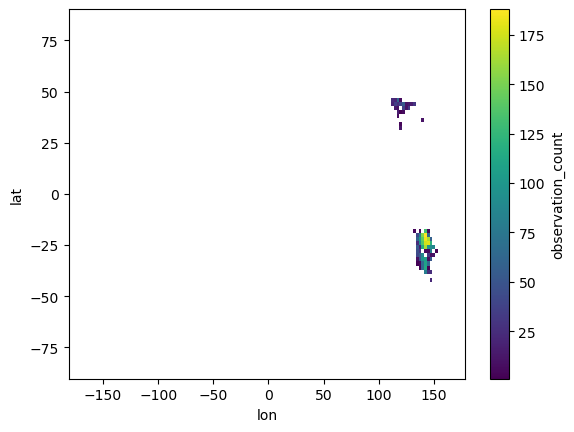

In [146]:
outds['observation_count'].mean('time').plot()